## Process Data in Code 

Data processing for deep learning will vary greatly depending on the type of data we're working with and the type of task we'll be using the network for.

In [2]:
import numpy as np 
from random import randint 
from sklearn.utils import shuffle
# There is another way of data scaling, where the minimum of feature
# is made equal to zero and the maximum of feature equal to one.
# MinMax Scaler shrinks the data within the given range, 
# usually of 0 to 1. It transforms data by scaling features to a 
# given range. It scales the values to a specific value range 
# without changing the shape of the original distribution.
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = [] #target data
train_samples = [] #input data

## Data Creation
For this simple task, we'll be creating our own example data set.

As motivation for this data, let's suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

Note that with the simplicity of the data along with the conclusions drawn from it, a neural network may be overkill, but understand this is just to first get introduced to working with data for deep learning, and later, we'll be making use of more advanced data sets.

In [4]:
#labels 1 ==> did experience, 0 ==> didn't experience:

for i in range(50):
    #The ~5% of younger individuals who did experience side effects.
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The ~5% of older individuals who didn't experience side effects.
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who didn't experience side effects.
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #The ~95% of older individuals who did experience side effects.
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_samples

[49,
 70,
 34,
 93,
 40,
 69,
 53,
 96,
 19,
 91,
 18,
 77,
 15,
 67,
 34,
 85,
 28,
 81,
 40,
 67,
 62,
 76,
 45,
 87,
 44,
 91,
 16,
 80,
 35,
 73,
 58,
 83,
 44,
 89,
 14,
 73,
 30,
 84,
 56,
 83,
 48,
 78,
 24,
 73,
 15,
 99,
 24,
 77,
 19,
 86,
 64,
 74,
 15,
 79,
 18,
 77,
 36,
 95,
 44,
 87,
 37,
 93,
 46,
 96,
 22,
 98,
 42,
 97,
 60,
 93,
 28,
 65,
 30,
 92,
 42,
 82,
 14,
 92,
 14,
 83,
 17,
 85,
 56,
 100,
 29,
 79,
 27,
 99,
 17,
 75,
 13,
 66,
 39,
 87,
 13,
 99,
 15,
 77,
 28,
 72,
 62,
 91,
 16,
 88,
 31,
 82,
 19,
 71,
 18,
 79,
 27,
 84,
 51,
 71,
 17,
 78,
 36,
 77,
 51,
 69,
 42,
 90,
 33,
 72,
 30,
 93,
 51,
 89,
 58,
 69,
 16,
 69,
 31,
 96,
 30,
 75,
 51,
 68,
 49,
 67,
 32,
 68,
 16,
 67,
 42,
 100,
 38,
 80,
 46,
 92,
 51,
 88,
 16,
 74,
 44,
 75,
 55,
 70,
 31,
 70,
 21,
 66,
 44,
 72,
 18,
 99,
 55,
 74,
 18,
 82,
 57,
 86,
 49,
 87,
 15,
 81,
 35,
 82,
 21,
 67,
 31,
 75,
 57,
 67,
 19,
 81,
 29,
 68,
 52,
 76,
 24,
 93,
 28,
 70,
 23,
 82,
 51,
 99,
 20,
 93

In [6]:
train_labels

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


## Data Processing
We now convert both lists into numpy arrays due to what we discussed the fit() function expects, and we then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
np.c_[train_samples.reshape(2100,1), train_labels.reshape(2100,1)]


array([[49,  1],
       [70,  0],
       [34,  1],
       ...,
       [80,  1],
       [16,  0],
       [78,  1]])

In [8]:
train_labels, train_samples = shuffle(train_labels, train_samples)

We'll use scikit-learn's MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1.

In [9]:
scalar = MinMaxScaler(feature_range=(0,1))
# We reshape the data as a technical requirement just since 
# the fit_transform() function doesn't accept 1D data by default.
scaled_train_samples = scalar.fit_transform(train_samples.reshape(-1,1))

As expected, all of the data has been transformed to numbers between 0 and 1.

In [10]:
scaled_train_samples

array([[0.05747126],
       [0.33333333],
       [0.73563218],
       ...,
       [0.81609195],
       [0.11494253],
       [0.02298851]])

## Create An Artificial Neural Network

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy

## Build A Sequential Model

In [12]:
#model is an instance of a Sequential object. A tf.keras.Sequential
#model is a linear stack of layers. It accepts a list, and each element
#in the list should be a layer.
model = Sequential([
    Dense(units=16, input_shape=(1,), activation = 'relu'), #input_layer.
    Dense(units=32, activation = 'relu'), #hidden_layer.
    Dense(units=2, activation= 'softmax') #output_layer.
])

As discussed, we'll be training our network on the data that we generated and processed in the previous episode, and recall, this data is one-dimensional. The input_shape parameter expects a tuple of integers that matches the shape of the input data, so we correspondingly specify (1, ) as the input_shape of our one-dimensional data.

## Compiling The Model
The first thing we need to do to get the model ready for training

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Note that when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use *binary_crossentropy* as our loss, rather than *categorical_crossentropy*. Both options work equally well and achieve the exact same result.

## Training The Model
Now that the model is compiled, we can train it

In [14]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6502 - accuracy: 0.5600 - 527ms/epoch - 3ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6254 - accuracy: 0.6371 - 172ms/epoch - 820us/step
Epoch 3/30
210/210 - 0s - loss: 0.6019 - accuracy: 0.6838 - 170ms/epoch - 807us/step
Epoch 4/30
210/210 - 0s - loss: 0.5784 - accuracy: 0.7290 - 176ms/epoch - 836us/step
Epoch 5/30
210/210 - 0s - loss: 0.5539 - accuracy: 0.7633 - 174ms/epoch - 826us/step
Epoch 6/30
210/210 - 0s - loss: 0.5289 - accuracy: 0.7881 - 179ms/epoch - 850us/step
Epoch 7/30
210/210 - 0s - loss: 0.5038 - accuracy: 0.8081 - 171ms/epoch - 812us/step
Epoch 8/30
210/210 - 0s - loss: 0.4787 - accuracy: 0.8310 - 174ms/epoch - 826us/step
Epoch 9/30
210/210 - 0s - loss: 0.4543 - accuracy: 0.8486 - 179ms/epoch - 850us/step
Epoch 10/30
210/210 - 0s - loss: 0.4313 - accuracy: 0.8619 - 177ms/epoch - 841us/step
Epoch 11/30
210/210 - 0s - loss: 0.4102 - accuracy: 0.8738 - 190ms/epoch - 907us/step
Epoch 12/30
210/210 - 0s - loss: 0.3912 - accuracy: 0.8838 - 223m

Lastly, we specify *verbose=2*. This just specifies how much output to the console we want to see during each epoch of training. The verbosity levels range from 0 to 2, so we're getting the most verbose output.

In [15]:
model.predict([15,20,63,80,27,62])

1/1 [==============================] - 0s 91ms/step


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## What Is A Validation Set?

Before training begins, we can choose to remove a portion of the training set and place it in a validation set. Then, during training, the model will train only on the training set, and it will validate by evaluating the data in the validation set.

Essentially, the model is learning the features of the data in the training set, taking what it's learned from this data, and then predicting on the validation set. During each epoch, we will see not only the loss and accuracy results for the training set, but also for the validation set.

This allows us to see how well the model is generalizing on data it wasn't trained on because, recall, the validation data should not be part of the training data.

In [16]:
model.fit(x = scaled_train_samples,
          y = train_labels,
          validation_split = 0.1,
          batch_size = 10,
          epochs = 30,
          verbose= 2)

Epoch 1/30
189/189 - 0s - loss: 0.2634 - accuracy: 0.9413 - val_loss: 0.3820 - val_accuracy: 0.9000 - 315ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2620 - accuracy: 0.9434 - val_loss: 0.3836 - val_accuracy: 0.9000 - 175ms/epoch - 923us/step
Epoch 3/30
189/189 - 0s - loss: 0.2608 - accuracy: 0.9392 - val_loss: 0.3832 - val_accuracy: 0.9000 - 181ms/epoch - 955us/step
Epoch 4/30
189/189 - 0s - loss: 0.2596 - accuracy: 0.9397 - val_loss: 0.3814 - val_accuracy: 0.9095 - 180ms/epoch - 950us/step
Epoch 5/30
189/189 - 0s - loss: 0.2589 - accuracy: 0.9439 - val_loss: 0.3825 - val_accuracy: 0.9000 - 180ms/epoch - 950us/step
Epoch 6/30
189/189 - 0s - loss: 0.2577 - accuracy: 0.9450 - val_loss: 0.3832 - val_accuracy: 0.9000 - 180ms/epoch - 950us/step
Epoch 7/30
189/189 - 0s - loss: 0.2569 - accuracy: 0.9450 - val_loss: 0.3826 - val_accuracy: 0.9000 - 178ms/epoch - 939us/step
Epoch 8/30
189/189 - 0s - loss: 0.2561 - accuracy: 0.9407 - val_loss: 0.3824 - val_accuracy: 0.9000 - 178ms/epoch

## What is Inference?

 the model is using its knowledge gained from training and using it to infer a prediction or result.

In [17]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scalar.fit_transform(test_samples.reshape(-1,1))

In [18]:
test_samples

array([ 40,  58,  80,  76,  99,  78,  75,  62,  29,  55,  64,  68,  59,
        25,  79,  66,  28,  86,  27,  91,  22,  54,  39,  81, 100,  13,
        91,  68,  81,  89,  76,  17,  16,  20,  76,  67,  87,  31,  46,
        81,  99,  98,  85,  91,  43,  94,  93,  48,  58,  27,  65,  80,
        58,  67,  95,  17,  74,  29,  36,  92,  93,  31,  92,  74,  72,
        32,  66,  95,  83,  79,  72,  90,  41,  42,  55,  99,  89,  58,
        50,  70,  29,  78,  74,  19,  75,  27,  23,  19,  88,  73,  81,
        27,  20,  68,  91,  17,  81,  93,  48,  65,  86,  60,  29,  91,
        72,  84,  81,  58,  67,  35,  58,  61,  86,  79,  61,  56,  66,
        24,  90,  52,  97,  80,  47,  87,  36,  98,  64,  52,  21,  49,
        86,  15,  81,  88,  65,  72,  61,  73,  51,  91,  61,  70,  89,
        70,  72,  83,  83,  34,  72,  58,  28,  17,  86,  34,  39,  45,
        79,  57,  49,  35,  71,  77,  97,  87,  25,  94,  20,  89,  80,
        95,  66,  16,  88,  36,  43,  41,  68,  57,  78,  41,  1

In [19]:
test_labels

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [20]:
test_labels = np.array(test_labels)
tesn_samples = np.array(test_samples)
np.c_[test_samples.reshape(420,1), test_labels.reshape(420,1)]

array([[ 40,   1],
       [ 58,   0],
       [ 80,   1],
       [ 76,   1],
       [ 99,   1],
       [ 78,   1],
       [ 75,   1],
       [ 62,   0],
       [ 29,   0],
       [ 55,   1],
       [ 64,   0],
       [ 68,   1],
       [ 59,   0],
       [ 25,   0],
       [ 79,   1],
       [ 66,   1],
       [ 28,   0],
       [ 86,   1],
       [ 27,   0],
       [ 91,   1],
       [ 22,   0],
       [ 54,   0],
       [ 39,   0],
       [ 81,   1],
       [100,   1],
       [ 13,   0],
       [ 91,   1],
       [ 68,   1],
       [ 81,   1],
       [ 89,   1],
       [ 76,   1],
       [ 17,   0],
       [ 16,   0],
       [ 20,   0],
       [ 76,   1],
       [ 67,   1],
       [ 87,   1],
       [ 31,   0],
       [ 46,   0],
       [ 81,   1],
       [ 99,   1],
       [ 98,   1],
       [ 85,   1],
       [ 91,   1],
       [ 43,   0],
       [ 94,   1],
       [ 93,   1],
       [ 48,   0],
       [ 58,   0],
       [ 27,   0],
       [ 65,   1],
       [ 80,   1],
       [ 58,

In [21]:
scaled_test_samples

array([[0.31034483],
       [0.51724138],
       [0.77011494],
       [0.72413793],
       [0.98850575],
       [0.74712644],
       [0.71264368],
       [0.56321839],
       [0.18390805],
       [0.48275862],
       [0.5862069 ],
       [0.63218391],
       [0.52873563],
       [0.13793103],
       [0.75862069],
       [0.6091954 ],
       [0.17241379],
       [0.83908046],
       [0.16091954],
       [0.89655172],
       [0.10344828],
       [0.47126437],
       [0.29885057],
       [0.7816092 ],
       [1.        ],
       [0.        ],
       [0.89655172],
       [0.63218391],
       [0.7816092 ],
       [0.87356322],
       [0.72413793],
       [0.04597701],
       [0.03448276],
       [0.08045977],
       [0.72413793],
       [0.62068966],
       [0.85057471],
       [0.20689655],
       [0.37931034],
       [0.7816092 ],
       [0.98850575],
       [0.97701149],
       [0.82758621],
       [0.89655172],
       [0.34482759],
       [0.93103448],
       [0.91954023],
       [0.402

## Evaluating The Test Set
To get predictions from the model for the test set, we call *model.predict()*.

In [22]:
predictions = model.predict(x = scaled_test_samples,
                            batch_size = 10,
                            verbose = 0)

In [23]:
predictions

array([[0.9538423 , 0.04615769],
       [0.73307973, 0.26692027],
       [0.06590642, 0.9340936 ],
       [0.10659052, 0.89340955],
       [0.00641842, 0.99358165],
       [0.08336972, 0.91663027],
       [0.12021804, 0.8797819 ],
       [0.5681617 , 0.43183827],
       [0.96043944, 0.03956047],
       [0.8266782 , 0.17332174],
       [0.47661218, 0.5233878 ],
       [0.30373642, 0.6962636 ],
       [0.6955756 , 0.3044245 ],
       [0.9605715 , 0.03942839],
       [0.07408917, 0.9259109 ],
       [0.3866078 , 0.6133922 ],
       [0.9604726 , 0.03952743],
       [0.03209819, 0.9679019 ],
       [0.96050555, 0.03949438],
       [0.01736997, 0.98262995],
       [0.96067035, 0.03932961],
       [0.85147953, 0.1485204 ],
       [0.9550323 , 0.04496771],
       [0.05857028, 0.94142973],
       [0.00566382, 0.9943362 ],
       [0.9608974 , 0.03910262],
       [0.01736997, 0.98262995],
       [0.30373642, 0.6962636 ],
       [0.05857028, 0.94142973],
       [0.02223011, 0.9777699 ],
       [0.

Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.

Each element in the predictions list is itself a list of length 2. The sum of the two values in each list is 1. The reason for this is because the two columns contain probabilities for each possible output: experienced side effects and did not experience side effects. Each element in the predictions list is a probability distribution over all possible outputs.

The first column contains the probability for each patient not experiencing side effects, which is represented by a 0. The second column contains the probability for each patient experiencing side effects, which is represented by a 1.

We can also look only at the most probable prediction.

In [24]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## Create A Confusion Matrix For Neural Network Predictions

In [25]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt 

%matplotlib inline

In [26]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


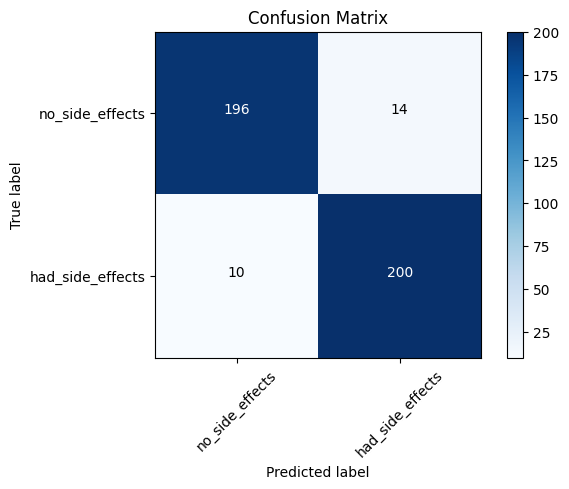

In [28]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


## Saving And Loading The Model In Its Entirety



In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Saving And Loading The Model In Its Entirety

In [30]:
#This method of saving will save everything about the model – the architecture,
#the weights, the optimizer, the state of the optimizer, the learning rate, the loss, etc.
model.save('models/medical_trail.h5')

In [34]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trail.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Saving And Loading Only The Architecture Of The Model

In [31]:
#There is another way we save only the architecture of the model. 
#This will not save the model weights, configurations, optimizer,
#loss or anything else. This only saves the architecture of the model.

#We can do this by calling model.to_json(). This will save the architecture
#of the model as a JSON string. If we print out the string, we can see 
#exactly what this looks like.
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [35]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Saving And Loading The Weights Of The Model

In [38]:
#We can do this by calling model.save_weights() and passing in 
#the path and file name to save the weights to with an h5 extension.
model.save_weights('models/my_model_weights.h5')
model.load_weights('models/my_model_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
